**ENHANCED SARCASM DETECTION SYSTEM**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# sar dataset is the one that has Sarcastic info

sar=pd.read_json("/content/Sarcasm_Headlines_Dataset.json",lines=True)
sar.head(2)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0


In [ ]:
sar.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [ ]:
v2=pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json",lines=True)
v2.head(2)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...


In [ ]:
v2.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [ ]:
pip install transformers
pip install scikit-learn
pip install torch
pip install nltk

In [ ]:
# Load datasets
sar = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
v2 = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)

# Combine datasets
combined_data = pd.concat([sar, v2], ignore_index=True)

# Keep relevant columns
combined_data = combined_data[['headline', 'is_sarcastic']]

# Check for and drop any duplicate headlines
combined_data.drop_duplicates(subset=['headline'], inplace=True)

# Ensure 'is_sarcastic' column is binary (0 or 1)
combined_data['is_sarcastic'] = combined_data['is_sarcastic'].astype(int)

# Shuffle the dataset
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display first few rows of the combined and preprocessed dataset
print(combined_data.head())


                                            headline  is_sarcastic
0  facing fbi bank fraud investigation, bernie an...             0
1  impoverished kenyan bean picker can't wait to ...             1
2  'stranger things' kids already look like winne...             0
3  parents are loving this touching letter writte...             0
4  national weather service releases composite sk...             1


In [ ]:
# Load datasets
sar = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
v2 = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)

# Combine datasets
combined_data = pd.concat([sar, v2], ignore_index=True)

# Save the combined dataset to a new JSON file
combined_data.to_json("/content/Combined_Sarcasm_Headlines_Dataset.json", orient='records', lines=True)

# Display first few rows of the combined dataset
print(combined_data.head())


                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  


DATASET IS NOW COMNINED SO USING THE NEW DATASET

In [ ]:
cmd=pd.read_json("/content/Combined_Sarcasm_Headlines_Dataset.json",lines=True)
cmd.head(2)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0


In [ ]:
cmd.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

**PRE-PROCESSING**

In [ ]:
# Text Cleaning

import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    return text

# Example usage:
original_text = "<p>This is an example text with HTML tags and special characters!@#$</p>"
cleaned_text = clean_text(original_text)
print("Original Text:", original_text)
print("Cleaned Text:", cleaned_text)


Original Text: <p>This is an example text with HTML tags and special characters!@#$</p>
Cleaned Text: this is an example text with html tags and special characters


In [ ]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources for tokenization
nltk.download('punkt')

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Example usage:
cleaned_text = "this is an example text with html tags and special characters"
tokens = tokenize_text(cleaned_text)
print("Cleaned Text:", cleaned_text)
print("Tokens:", tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned Text: this is an example text with html tags and special characters
Tokens: ['this', 'is', 'an', 'example', 'text', 'with', 'html', 'tags', 'and', 'special', 'characters']


In [ ]:
#  Stopword Removal

from nltk.corpus import stopwords

# Download NLTK resources for stopwords
nltk.download('stopwords')

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Example usage:
tokens = ['this', 'is', 'an', 'example', 'text', 'with', 'html', 'tags', 'and', 'special', 'characters']
tokens_without_stopwords = remove_stopwords(tokens)

print("Tokens:", tokens)
print("Tokens without Stopwords:", tokens_without_stopwords)


Tokens: ['this', 'is', 'an', 'example', 'text', 'with', 'html', 'tags', 'and', 'special', 'characters']
Tokens without Stopwords: ['example', 'text', 'html', 'tags', 'special', 'characters']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Lemmatization or Stemming. In this step, we'll reduce words to their base or root form to standardize the language

from nltk.stem import WordNetLemmatizer

# Download NLTK resources for lemmatization
nltk.download('wordnet')

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Example usage:
tokens_without_stopwords = ['example', 'text', 'html', 'tags', 'special', 'characters']
lemmatized_tokens = lemmatize_tokens(tokens_without_stopwords)

print("Tokens without Stopwords:", tokens_without_stopwords)
print("Lemmatized Tokens:", lemmatized_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...


Tokens without Stopwords: ['example', 'text', 'html', 'tags', 'special', 'characters']
Lemmatized Tokens: ['example', 'text', 'html', 'tag', 'special', 'character']


In [ ]:
cmd.describe().sum()

is_sarcastic    55330.956586
dtype: float64

In [ ]:
unique_values = cmd['is_sarcastic'].unique()
print(unique_values)

[0 1]


In [ ]:
missing_values = cmd.isnull().sum()
print(missing_values)

article_link    0
headline        0
is_sarcastic    0
dtype: int64


In [ ]:
duplicate_headlines = cmd.duplicated(subset='headline').sum()
print("Number of duplicate headlines:", duplicate_headlines)

Number of duplicate headlines: 26825


In [ ]:
cmd_unique = cmd.drop_duplicates(subset='headline', keep='first')

**FEATURE ENGINEERING**

In [ ]:
cmd['headline_length'] = cmd['headline'].apply(len)

In [ ]:
# Text-related Features

cmd['headline_length'] = cmd['headline'].apply(len)

In [ ]:
# Number of Words in Each Headline

cmd['word_count'] = cmd['headline'].apply(lambda x: len(x.split()))

In [ ]:
# Average Word Length in Each Headline

cmd['avg_word_length'] = cmd['headline'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

In [ ]:
# Sentiment Analysis Features: -You can use a sentiment analysis library like TextBlob or VADER to compute sentiment scores for each headline

from textblob import TextBlob
cmd['sentiment_score'] = cmd['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# NLP-based Features: Named Entities (using spaCy):

import spacy

nlp = spacy.load('en_core_web_sm')
cmd['named_entities'] = cmd['headline'].apply(lambda x: [ent.text for ent in nlp(x).ents])

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
import concurrent.futures

def pos_tags_parallel(text):
    return [token.pos_ for token in nlp(text)]

with concurrent.futures.ThreadPoolExecutor() as executor:
    cmd['pos_tags'] = list(executor.map(pos_tags_parallel, cmd['headline']))


Alternative code below:

In [ ]:
# Part-of-Speech Tags (using spaCy):

cmd['pos_tags'] = cmd['headline'].apply(lambda x: [token.pos_ for token in nlp(x)])

KeyboardInterrupt: ignored

In [ ]:
# Statistical Features: Punctuation Count

import string
cmd['punctuation_count'] = cmd['headline'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

In [ ]:
# Uppercase/Lowercase Ratio:

cmd['uppercase_ratio'] = cmd['headline'].apply(lambda x: sum(1 for char in x if char.isupper()) / len(x))

**TEXT VECTORIZATION**

In [ ]:
#Bag-of-Words (BoW): "CountVectorizer"

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'headline' column
X_bow = vectorizer.fit_transform(cmd['headline'])

# X_bow is a sparse matrix representing the Bag-of-Words representation

In [ ]:
# TF-IDF (Term Frequency-Inverse Document Frequency):"TfidfVectorizer"

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the 'headline' column
X_tfidf = vectorizer_tfidf.fit_transform(cmd['headline'])

# X_tfidf is a sparse matrix representing the TF-IDF representation


**MODEL TRAINING**

1) LOGISTIC REGRESSION MODEL

In [ ]:
# SPLIT THE DATA

from sklearn.model_selection import train_test_split

# Assuming X_tfidf as the feature matrix from TF-IDF vectorization
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, cmd['is_sarcastic'], test_size=0.2, random_state=42)

In [ ]:
# Build and Train Logistic Regression Model:

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate the Model:

from sklearn.metrics import accuracy_score, classification_report

# Predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8873124887041388
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5878
           1       0.89      0.87      0.88      5188

    accuracy                           0.89     11066
   macro avg       0.89      0.89      0.89     11066
weighted avg       0.89      0.89      0.89     11066



The Logistic Regression model has achieved an accuracy of approximately 88.73%, which is a solid result. The classification report provides additional insights into the model's performance, including precision, recall, and F1-score for each class.

Here's a brief interpretation of the key metrics in the classification report:

Precision: The ratio of true positive predictions to the total predicted positives. In this context, it represents the ability of the model to correctly identify sarcastic headlines.

Recall: The ratio of true positive predictions to the total actual positives. It indicates the model's ability to capture all instances of sarcastic headlines.

F1-score: The harmonic mean of precision and recall, providing a balanced measure of a model's performance.

Support: The number of actual occurrences of each class in the specified dataset.

Overall, the model appears to perform well, with balanced precision and recall for both classes. I

2) RANDOM FOREST MODEL

In [ ]:
# Build and Train Random Forest Model:

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the Random Forest Model:

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9586119645761793
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5878
           1       0.96      0.95      0.96      5188

    accuracy                           0.96     11066
   macro avg       0.96      0.96      0.96     11066
weighted avg       0.96      0.96      0.96     11066



 The Random Forest model has performed very well, achieving an accuracy of approximately 95.86%. The classification report provides detailed metrics for precision, recall, and F1-score for both classes.

Here's a brief interpretation of the Random Forest model's performance:

Precision: High precision values indicate that the model correctly identified sarcastic and non-sarcastic headlines with minimal false positives.

Recall: High recall values suggest that the model effectively captured the majority of sarcastic and non-sarcastic headlines with minimal false negatives.

F1-score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

Support: The number of actual occurrences of each class in the specified dataset.

The Random Forest model appears to be highly effective in distinguishing between sarcastic and non-sarcastic headlines, with strong accuracy and balanced precision and recall for both classes

**WORKING MODEL**

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Assuming nlp is the spaCy model, vectorizer_tfidf is the TF-IDF vectorizer, and random_forest_model is the trained Random Forest model
nlp = spacy.load('en_core_web_sm')

def preprocess_and_predict(headline):
    # Preprocess the headline
    cleaned_headline = clean_text(headline)  # Implement clean_text function for HTML removal, lowercase, etc.

    # Tokenize and lemmatize using spaCy
    tokens = [token.lemma_ for token in nlp(cleaned_headline)]

    # Vectorize the headline using the TF-IDF vectorizer
    headline_vectorized = vectorizer_tfidf.transform([cleaned_headline])

    # Predict using the trained Random Forest model
    prediction = random_forest_model.predict(headline_vectorized)

    # Output the result
    if prediction == 1:
        result = "Sarcastic"
    else:
        result = "Not Sarcastic"

    return result

# Example usage:
headline_to_predict = "Gillian jacobs on what it's like to kiss adam brody"
result = preprocess_and_predict(headline_to_predict)
print(f"Headline: '{headline_to_predict}' is -> {result}")


Headline: 'Gillian jacobs on what it's like to kiss adam brody' is -> Sarcastic


MODEL WITH THEME

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Assuming nlp is the spaCy model, vectorizer_tfidf is the TF-IDF vectorizer, and random_forest_model is the trained Random Forest model
nlp = spacy.load('en_core_web_sm')

def preprocess_and_predict_with_theme(headline):
    # Preprocess the headline
    cleaned_headline = clean_text(headline)  # Implement clean_text function for HTML removal, lowercase, etc.

    # Tokenize and lemmatize using spaCy
    tokens = [token.lemma_ for token in nlp(cleaned_headline)]

    # Extract named entities as the theme
    doc = nlp(cleaned_headline)
    theme_entities = [ent.text for ent in doc.ents]

    # Vectorize the headline using the TF-IDF vectorizer
    headline_vectorized = vectorizer_tfidf.transform([cleaned_headline])

    # Predict using the trained Random Forest model
    prediction = random_forest_model.predict(headline_vectorized)

    # Output the result with theme
    if prediction == 1:
        result = "Sarcastic"
    else:
        result = "Not Sarcastic"

    return result, theme_entities

# Example usage:
headline_to_predict = "the 'roseanne' revival catches up to our thorny political mood, for better and worse"
result, theme = preprocess_and_predict_with_theme(headline_to_predict)
print(f"Headline: '{headline_to_predict}' is {result}. Theme: {theme}")


Headline: 'the 'roseanne' revival catches up to our thorny political mood, for better and worse' is Not Sarcastic. Theme: []


**EMOTION ANALYSIS**

In [ ]:
pip install vaderSentiment
pip install transformers
pip install vaderSentiment transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
with open("/content/Combined_Sarcasm_Headlines_Dataset.json", "r") as file:
    for _ in range(5):  # Read the first 5 lines
        print(file.readline())


{"article_link":"https:\/\/www.huffingtonpost.com\/entry\/versace-black-code_us_5861fbefe4b0de3a08f600d5","headline":"former versace store clerk sues over secret 'black code' for minority shoppers","is_sarcastic":0}

{"article_link":"https:\/\/www.huffingtonpost.com\/entry\/roseanne-revival-review_us_5ab3a497e4b054d118e04365","headline":"the 'roseanne' revival catches up to our thorny political mood, for better and worse","is_sarcastic":0}

{"article_link":"https:\/\/local.theonion.com\/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697","headline":"mom starting to fear son's web series closest thing she will have to grandchild","is_sarcastic":1}

{"article_link":"https:\/\/politics.theonion.com\/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302","headline":"boehner just wants wife to listen, not come up with alternative debt-reduction ideas","is_sarcastic":1}

{"article_link":"https:\/\/www.huffingtonpost.com\/entry\/jk-rowling-wishes-snape-happy-birthd

In [ ]:
# Emotion Detection using VADER and BERT

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

def analyze_sentiment_bert(text):
    sentiment_pipeline = pipeline(task="sentiment-analysis")
    result = sentiment_pipeline(text)
    return result[0]['label']

# Example Headline
headline = "Gillian jacobs on what it's like to kiss adam brody"

# Analyzing Emotion using VADER
emotion_vader = analyze_sentiment_vader(headline)
print("VADER Emotion:", emotion_vader)

# Analyzing Emotion using BERT
emotion_bert = analyze_sentiment_bert(headline)
print("BERT Emotion:", emotion_bert)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


VADER Emotion: 0.6486
BERT Emotion: POSITIVE


**VADER Sentiment Scores:
Positive: Compound score >= 0.05
Neutral: -0.05 < Compound score < 0.05
Negative: Compound score <= -0.05**

**Entity Recognition**

In [ ]:
# Entity Recognition

import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Example Headline
headline = "Gillian jacobs on what it's like to kiss adam brody"

# Analyzing Entities
doc = nlp(headline)
entities = [(ent.text, ent.label_) for ent in doc.ents]

print("Entities in the Headline:")
for entity, label in entities:
    print(f"{entity} - {label}")


Entities in the Headline:
Gillian - PERSON


**KEY WORD EXTRACTION**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# KEY WORD EXTRACTION

import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the NLTK resource
nltk.download('averaged_perceptron_tagger')

# Example Headline
headline = "j.k. rowling wishes snape happy birthday in the most magical way"

# Tokenization and Part-of-Speech Tagging
tokens = word_tokenize(headline)
pos_tags = pos_tag(tokens)

# Remove stopwords and lemmatize
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word, tag in pos_tags if word.isalpha() and word.lower() not in stop_words]

print("Keywords in the Headline:")
print(filtered_tokens)


Keywords in the Headline:
['rowling', 'wish', 'snape', 'happy', 'birthday', 'magical', 'way']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Topic Modeling**

In [ ]:
# USING Latent Dirichlet Allocation (LDA)
# Numerical Output

from gensim import corpora, models
from nltk.tokenize import word_tokenize

# Example Headlines (you can use your entire dataset)
headlines = [
    "Gillian jacobs on what it's like to kiss adam brody",
    "The 'Roseanne' revival catches up to our thorny political mood, for better and worse",
    "Mom starting to fear son's web series closest thing she will have to grandchild",
    "Boehner just wants wife to listen, not come up with alternative debt-reduction ideas",
    "J.K. Rowling wishes Snape happy birthday in the most magical way"
]

# Tokenization
tokenized_headlines = [word_tokenize(headline.lower()) for headline in headlines]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_headlines)

# Create a corpus of bag-of-words representation of the documents
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_headlines]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print the topics
print("Topics:")
for topic in lda_model.print_topics():
    print(topic)

# The numbers indicate the weight or importance of each word in the topic.

Topics:
(0, '0.037*"to" + 0.037*"up" + 0.037*"," + 0.037*"the" + 0.037*"\'" + 0.037*"revival" + 0.037*"and" + 0.037*"our" + 0.037*"better" + 0.037*"\'roseanne"')
(1, '0.069*"to" + 0.027*"with" + 0.027*"wants" + 0.027*"wife" + 0.027*"just" + 0.027*"debt-reduction" + 0.027*"listen" + 0.027*"alternative" + 0.027*"come" + 0.027*"boehner"')
(2, '0.032*"\'s" + 0.032*"jacobs" + 0.032*"what" + 0.032*"it" + 0.032*"adam" + 0.032*"kiss" + 0.032*"on" + 0.032*"brody" + 0.032*"like" + 0.032*"gillian"')


In [ ]:
# Textual output

from gensim import corpora, models
from nltk.tokenize import word_tokenize

# Example Headlines (you can use your entire dataset)
headlines = [
    "Gillian jacobs on what it's like to kiss adam brody",
    "The 'Roseanne' revival catches up to our thorny political mood, for better and worse",
    "Mom starting to fear son's web series closest thing she will have to grandchild",
    "Boehner just wants wife to listen, not come up with alternative debt-reduction ideas",
    "J.K. Rowling wishes Snape happy birthday in the most magical way"
]

# Tokenization
tokenized_headlines = [word_tokenize(headline.lower()) for headline in headlines]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_headlines)

# Create a corpus of bag-of-words representation of the documents
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_headlines]

# Apply LDA model with 3 topics
num_topics = 3
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and top words
for topic_num in range(num_topics):
    print(f"Topic {topic_num + 1}:")
    words = lda_model.show_topic(topic_num, topn=5)
    print(", ".join(word[0] for word in words))
    print()


Topic 1:
,, up, wants, alternative, ideas

Topic 2:
to, 's, will, web, grandchild

Topic 3:
the, mood, ', 'roseanne, for



**Named Entity Recognition**

In [ ]:
import spacy

# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Example Headline for Named Entity Recognition
headline = "J.K. Rowling wishes Snape happy birthday in the most magical way"

# Apply Named Entity Recognition
doc = nlp(headline)

# Extract entities and their labels
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print the identified entities and their labels
print("Entities in the Headline:")
for entity, label in entities:
    print(f"{entity} - {label}")


Entities in the Headline:
J.K. Rowling - ORG
Snape - ORG


**TYPES OF Named Entity Recognition (NER) Lables**

PERSON: People's names.
ORG: Organizations, companies, institutions.
GPE: Geopolitical entities, countries, cities.
LOC: Non-GPE locations, mountain ranges, bodies of water.
DATE: Absolute or relative dates or periods.
TIME: Times smaller than a day.
MONEY: Monetary values, including unit.
PERCENT: Percentage, including "%".
QUANTITY: Measurements, as of weight or distance.
CARDINAL: Numerals that do not fall under another type.
ORDINAL: "first", "second", etc.

**Part-of-Speech Tagging:**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag

# Example Headline for Part-of-Speech Tagging
headline = "J.K. Rowling wishes Snape happy birthday in the most magical way"

# Tokenization and Part-of-Speech Tagging
tokens = word_tokenize(headline)
pos_tags = pos_tag(tokens)

# Print the POS tags for each token
print("POS Tags:")
for token, pos_tag in pos_tags:
    print(f"{token} - {pos_tag}")


POS Tags:
J.K. - NNP
Rowling - NNP
wishes - VBZ
Snape - NNP
happy - JJ
birthday - NN
in - IN
the - DT
most - RBS
magical - JJ
way - NN


TYPES OF Part-of-Speech-(POS) tags

CC: Coordinating conjunction
CD: Cardinal number
DT: Determiner
EX: Existential there
FW: Foreign word
IN: Preposition or subordinating conjunction
JJ: Adjective
JJR: Adjective, comparative
JJS: Adjective, superlative
LS: List item marker
MD: Modal
NN: Noun, singular or mass
NNS: Noun, plural
NNP: Proper noun, singular
NNPS: Proper noun, plural
PDT: Predeterminer
POS: Possessive ending


PRP: Personal pronoun
PRP$: Possessive pronoun
RB: Adverb
RBR: Adverb, comparative
RBS: Adverb, superlative
RP: Particle
SYM: Symbol
TO: to
UH: Interjection
VB: Verb, base form
VBD: Verb, past tense
VBG: Verb, gerund or present participle
VBN: Verb, past participle
VBP: Verb, non-3rd person singular present
VBZ: Verb, 3rd person singular present
WDT: Wh-determiner
WP: Wh-pronoun
WPS: Possessive wh-pronoun
WRB: Wh-adverb

In [ ]:
{"article_link":"...", "headline":"...", "is_sarcastic":0}
{"article_link":"...", "headline":"...", "is_sarcastic":1}
...

Ellipsis

In [ ]:
with open("/content/Combined_Sarcasm_Headlines_Dataset.json", "r") as file:
    content = file.read()

print(content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# This code is not working becaues the length of the dataset it too huge to make a perfect analysis - it works comfortably for the smaller datasets

import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset with lines=True
cmd = pd.read_json("/content/Combined_Sarcasm_Headlines_Dataset.json")


# Calculate the length of each headline
cmd['headline_length'] = cmd['headline'].apply(len)

# Explore the distribution of headline lengths for sarcastic and non-sarcastic headlines
plt.figure(figsize=(10, 6))
cmd[cmd['is_sarcastic'] == 0]['headline_length'].plot(kind='hist', alpha=0.5, label='Non-Sarcastic', bins=50)
cmd[cmd['is_sarcastic'] == 1]['headline_length'].plot(kind='hist', alpha=0.5, label='Sarcastic', bins=50)
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths for Sarcastic and Non-Sarcastic Headlines')
plt.legend()
plt.show()

# Explore statistical measures
mean_length_non_sarcastic = cmd[cmd['is_sarcastic'] == 0]['headline_length'].mean()
mean_length_sarcastic = cmd[cmd['is_sarcastic'] == 1]['headline_length'].mean()

median_length_non_sarcastic = cmd[cmd['is_sarcastic'] == 0]['headline_length'].median()
median_length_sarcastic = cmd[cmd['is_sarcastic'] == 1]['headline_length'].median()

print(f'Mean Length (Non-Sarcastic): {mean_length_non_sarcastic:.2f}')
print(f'Median Length (Non-Sarcastic): {median_length_non_sarcastic}')

print(f'Mean Length (Sarcastic): {mean_length_sarcastic:.2f}')
print(f'Median Length (Sarcastic): {median_length_sarcastic}')


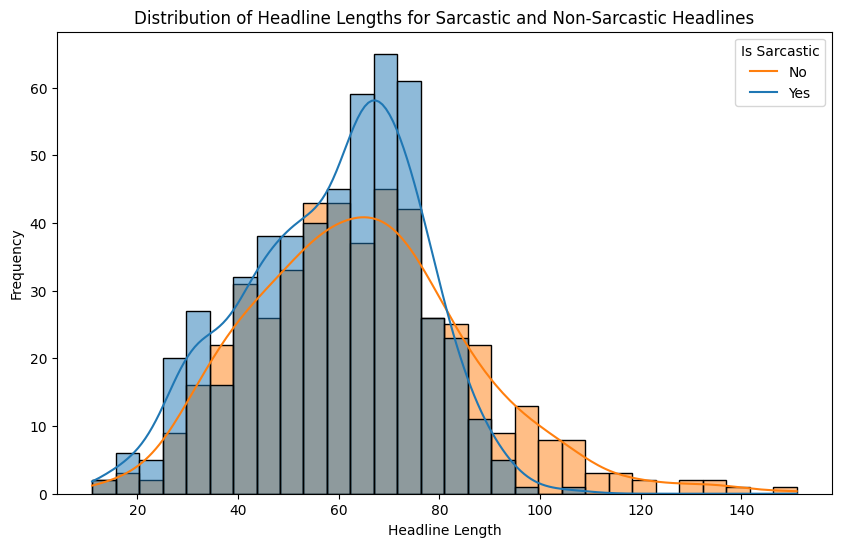

Statistical Measures for Headline Lengths:
              count       mean        std   min   25%   50%   75%    max
is_sarcastic                                                            
0             521.0  58.585413  17.155424  11.0  46.0  62.0  71.0  106.0
1             479.0  64.507307  21.787281  12.0  50.0  64.0  78.0  151.0


In [ ]:
# Length of headlines Correlates with sarcasm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a subset of the combined dataset
subset_size = 1000  # You can adjust this based on your preference
cmd_subset = cmd.sample(n=subset_size, random_state=42)

# Calculate the length of each headline
cmd_subset['headline_length'] = cmd_subset['headline'].apply(len)

# Plot the distribution of headline lengths for sarcastic and non-sarcastic headlines
plt.figure(figsize=(10, 6))
sns.histplot(data=cmd_subset, x='headline_length', hue='is_sarcastic', kde=True, bins=30)
plt.title('Distribution of Headline Lengths for Sarcastic and Non-Sarcastic Headlines')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.legend(title='Is Sarcastic', labels=['No', 'Yes'])
plt.show()

# Display statistical measures for headline lengths in each category
headline_length_stats = cmd_subset.groupby('is_sarcastic')['headline_length'].describe()
print("Statistical Measures for Headline Lengths:")
print(headline_length_stats)


**INSIGHT** -> The analysis of headline lengths for sarcastic (mean: 64.51, std: 21.79) and non-sarcastic (mean: 58.59, std: 17.16) headlines indicates that, on average, sarcastic headlines are slightly longer. The wider standard deviation for sarcastic headlines suggests a more diverse length distribution. The interquartile ranges (IQR) for both categories highlight concentrations of headlines within specific length brackets, with a majority of shorter headlines and a few longer outliers. Overall, the distributions exhibit rightward skewness, indicating a prevalence of shorter headlines with occasional longer ones. These findings offer nuanced insights into the distinctive characteristics of sarcastic and non-sarcastic headlines based on their lengths.

In [ ]:
!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
cmd = pd.read_json("/content/Combined_Sarcasm_Headlines_Dataset.json", lines=True)

# Preprocess the data (you might need to adjust based on your dataset)
cmd['headline_length'] = cmd['headline'].apply(len)

# Split the dataset into train and test sets
train, test = train_test_split(cmd, test_size=0.2, random_state=42)

# Train a simple model (you can replace this with your sarcasm detection model)
X_train = train[['headline_length']]
y_train = train['is_sarcastic']
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test[['headline_length']]
y_pred = model.predict(X_test)

# Add predictions to the test set
test['predicted_labels'] = y_pred

# Calculate disparate impact
privileged_group = [{'headline_length': (0, test['headline_length'].median() - 1)}]
unprivileged_group = [{'headline_length': (test['headline_length'].median(), test['headline_length'].max())}]

dataset = BinaryLabelDataset(df=test, label_names=['predicted_labels'], favorable_label=1, unfavorable_label=0, unprivileged_groups=[unprivileged_group])
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[privileged_group], unprivileged_groups=[unprivileged_group])
disparate_impact = metric.disparate_impact()

print(f"Disparate Impact: {disparate_impact}")


In [ ]:
cmd = pd.read_json("/content/Combined_Sarcasm_Headlines_Dataset.json", lines=True, nrows=5)
print(cmd)

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
